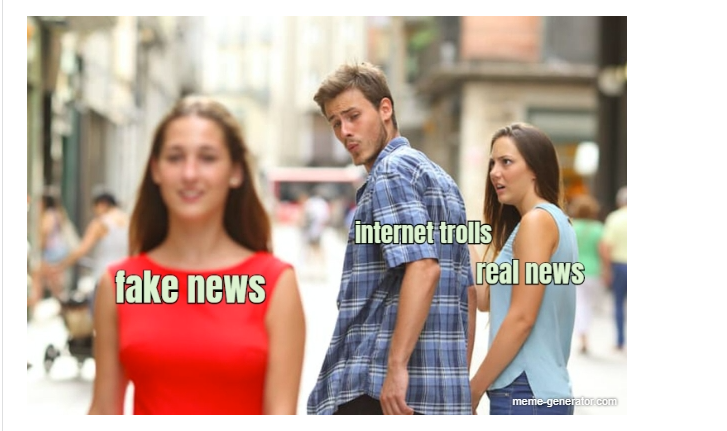

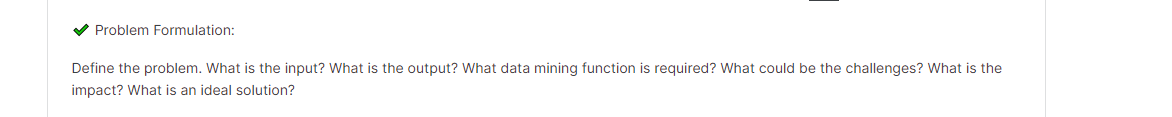

1_Define the problem: 

    The problem is to develop a machine learning model that can accurately classify Reddit posts as fake news or not based on 
    their title. This task can help mitigate the spread of false information on social media platforms.

2_What is the input? 

The input is a text string that represents the title of a Reddit post. The text may contain various 
forms of words, including slang, misspellings, abbreviations, and other variations that can make text classification challenging.

3_What is the output? 

The output is a binary classification label that indicates whether the Reddit post is fake news or not. 
This label can be represented as a 0 or 1, where 0 represents a genuine post and 1 represents a fake news post.

4_What data mining function is required? 

A text classification algorithm is required to perform the classification task. This involves preprocessing the text data, extracting relevant features, 
and training a machine learning model to classify the posts. Some of the data mining techniques that can be used in this task include text preprocessing, 
feature engineering, model selection, and hyperparameter tuning.

5_What could be the challenges? 

Some of the challenges include dealing with the unstructured nature of the text data, identifying relevant features that can
help discriminate between fake and real news, and addressing issues of class imbalance or bias in the dataset. Additionally, the text data may contain noise, 
ambiguity, and subjectivity that can make it difficult to develop a robust classification model.

6_What is the impact? 

The impact of this project is to help identify and mitigate the spread of fake news on social media platforms, which can have significant social and political consequences.
By accurately identifying fake news posts, this project can help prevent the spread of misinformation, promote media literacy, and enhance the credibility of online information
sources.

7_What is an ideal solution? 

At my experiance 
Trail_5:

1-Useing RandomForestClassifier model for my data
2-using pipline and TfidfVectorizer (word)
3-using RandomizedSearchCV for tuning parameters
public Score: 0.87621
Private score: 0.87563
this mean that RandomForestClassifier is best classifier for this data
but in general:
An ideal solution would be to develop a highly accurate classification model that can effectively identify fake news posts with high precision and recall. This would involve 
careful selection of preprocessing techniques,feature extraction methods, and machine learning algorithms, as well as rigorous testing and evaluation of
the model on a diverse range of datasets.
Additionally,  the solution should be scalable and easy to deploy on a large volume of data in real-time. The solution should also be interpretable, so that the factors that contribute 
to the classification decision can be easily understood and explained.

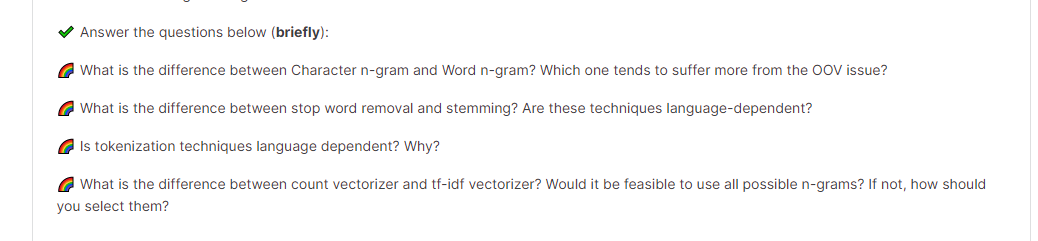

1_What is the difference between Character n-gram and Word n-gram?  Which one tends to suffer more from the OOV issue?

Character n-grams are sequences of characters of length n, whereas word n-grams are sequences of words of length n. Character n-grams are useful for capturing information about the morphology and spelling of words, while word n-grams capture information about the semantics and syntax of language.

Character n-grams tend to suffer more from the OOV (out-of-vocabulary) issue, as they can generate a large number of n-grams that may not be present in the training data. This is because words can be spelled in different ways and may contain misspellings, abbreviations, and other variations that can increase the number of unique n-grams. Word n-grams, on the other hand, tend to be less affected by the OOV issue, as they are based on the presence or absence of whole words, which are more likely to be present in the training data.

2_What is the difference between stop word removal and stemming? Are these techniques language-dependent?

Stop word removal is the process of removing frequently occurring words, such as "the", "and", and "a", from a text corpus. These words are not informative for text classification tasks and can be safely removed without losing valuable information.

Stemming, on the other hand, is the process of reducing words to their base or root form by removing suffixes and prefixes. For example, the words "running", "runs", and "run" would be reduced to the base form "run". Stemming can help reduce the dimensionality of the data and improve the accuracy of text classification models.

Both techniques are language-dependent, as the list of stop words and the rules for stemming can vary depending on the language and the context of the text corpus. For example, stop words in English may differ from stop words in Spanish, and the rules for stemming may need to be adapted to account for irregular verbs and noun forms in different languages.

3_Is tokenization techniques language dependent? Why?

Tokenization is the process of breaking down a text corpus into individual units, or tokens, such as words, punctuation marks, or other symbols. Tokenization techniques can be language-dependent, as different languages may have different rules for tokenizing text.

For example, in English, words are typically separated by spaces, while in languages like Chinese and Japanese, there may be no spaces between words. Similarly, in some languages, such as Arabic and Hebrew, words are written from right to left instead of left to right, which can affect the tokenization process.

Tokenization techniques may also need to be adapted to account for the specific context of the text corpus, such as the presence of abbreviations, acronyms, or other non-standard forms of text.

4_What is the difference between count vectorizer and tf-idf vectorizer? Would it be feasible to use all possible n-grams? If not, how should you select them?

Count vectorizer is a technique for converting a text corpus into a matrix of word counts, where each row represents a document and each column represents a unique word in the corpus. Tf-idf vectorizer, on the other hand, is a technique for weighting the word counts based on their frequency and importance in the corpus. Tf-idf vectorizer assigns higher weights to words that are more frequent in a particular document but less frequent in the overall corpus.

It would not be feasible to use all possible n-grams, as this would generate a very large number of features and increase the computational complexity of the classification task. Instead, it is common to limit the number of n-grams based on their frequency or information gain, or to use a technique such as feature selection or dimensionality reduction to identify the most informative n-grams.

To select the most informative n-grams, one approach is to use techniques such as mutual information or chi-squared tests to identify the n-grams that are most strongly associated with the target variable. Another approach is to use domain knowledge or heuristic rules to select n-grams that are likely to be informative based on the specific context of the text corpus.

# > **Import Libraries**

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string as st#Common string operations
import re#Regular expression operations
import nltk#Natural Language Toolkit
from nltk.tokenize import word_tokenize#Tokenizers divide strings into lists of substrings
from nltk.corpus import stopwords#remove stop words
from sklearn.pipeline import Pipeline#create pipline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV#model tuning
from xgboost import XGBClassifier#XGBClassifier model for classification
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import train_test_split#split text into train and test 
from sklearn.feature_extraction.text import TfidfVectorizer#vectorize text into numeric useing Tfidf
import warnings #handling warning 
warnings.filterwarnings('ignore')

In [11]:
nltk.download('punkt')#download punkt pakages from nltk library
nltk.download('stopwords')#download stopwords pakages from nltk library
nltk.download('wordnet')#download wordnet pakages from nltk library

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
# Read raw data (train data)
data = pd.read_csv("/kaggle/input/cisc-873-dm-w23-a3/xy_train.csv", sep=",", na_values=[""])

In [13]:
#Make a duplicate of the original file.
data_train=data.copy()

In [14]:
#drop id
data_train=data_train.drop(['id'],axis=1)

In [15]:
#Remove all rows from the dataset where the label is equal to 2.
data_train = data_train[data_train.label!= 2]

In [16]:
#label of our data 
y_train=data_train['label']

In [17]:
data_train#data befor any preprocessing 

,text,label
0,A group of friends began to volunteer at a hom...,0
1,British Prime Minister @Theresa_May on Nerve A...,0
2,"In 1961, Goodyear released a kit that allows P...",0
3,"Happy Birthday, Bob Barker! The Price Is Right...",0
4,"Obama to Nation: 聙""Innocent Cops and Unarmed Y...",0
...,...,...
59995,Finish Sniper Simo H盲yh盲 during the invasion o...,0
59996,Nigerian Prince Scam took $110K from Kansas ma...,1
59997,Is It Safe To Smoke Marijuana During Pregnancy...,0
59998,Julius Caesar upon realizing that everyone in ...,0


**creating a tool for reducing words in English text to their base form and a set of common English words to be removed from text data during preprocessing.** 

**These steps help prepare text data for use in machine learning tasks.**

# **Trial_1** 

**is a text preprocessing task that involves cleaning and preparing text data for use in machine learning tasks. The steps involved in this task include:**

1. Removing HTML characters and ASCII to ensure that the text only contains relevant information.
1. Converting the text to lowercase to reduce the dimensionality of the data.
1. Removing punctuation to reduce noise and improve the accuracy of text classification models.
1. Removing stop words to eliminate common words that do not carry much meaning or context.
1. Tokenizing the text to break it down into individual units, such as words or sentences.
1. Optionally, performing either stemming or lemmatization to reduce words to their base or root form.

In [18]:
# A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore
stemmer = SnowballStemmer(language='english')
stop_words = set(stopwords.words("english"))

**imports the necessary packages from the Natural Language Toolkit (NLTK) library to perform text preprocessing tasks**
**the WordNetLemmatizer class from the NLTK.stem module. The WordNetLemmatizer is a lemmatization algorithm that reduces words to their base or root form by removing suffixes and prefixes. This step helps to reduce the dimensionality of the data and improve the accuracy of text classification models.**

In [19]:
from nltk.stem import WordNetLemmatizer #Lemmatization is the process of converting a word to its base form
from nltk.corpus import stopwords#we remove the low-level information from our text in order to give more focus to the important
stop_words = set(stopwords.words("english")) 
lemmatizer = WordNetLemmatizer() 

**defines a function called text_clean that performs several text preprocessing tasks:**

1. Converts all whitespaces (including tabs) to single whitespace.
1. Converts all text to lowercase.
1. Removes stop words, punctuation, and stems remaining words.
1. Keeps only ASCII and European characters and whitespace, no digits.
1. Removes any HTML tags that may be present in the text.

In [20]:
# convert all whitespaces (tabs etc.) to single wspace
# all lowercase
#remove stopwords, punctuation and stemm
#Keep only ASCII + European Chars and whitespace, no digits
#remove any html tags (< /br> often found)
import string
def text_clean(text,for_embedding=True):#I will apply embedding 
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)    
    text = text.lower()
    if for_embedding:
        # Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž,.!? ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž,.!?]\b", re.IGNORECASE)

    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:#apply stemmer
        words_filtered = [
            stemmer.stem(word) for word in words_tokens_lower if word not in stop_words
        ]

    text_clean = " ".join(words_filtered)
    return text_clean
     

In [21]:
data_train['text_clean'] = data_train['text'].apply(text_clean)#apply function text_clean on text data 

In [22]:
data_train

,text,label,text_clean
0,A group of friends began to volunteer at a hom...,0,group of friends began to volunteer at homeles...
1,British Prime Minister @Theresa_May on Nerve A...,0,british prime minister theresa may on nerve at...
2,"In 1961, Goodyear released a kit that allows P...",0,"in , goodyear released kit that allows ps to b..."
3,"Happy Birthday, Bob Barker! The Price Is Right...",0,"happy birthday , bob barker ! the price is rig..."
4,"Obama to Nation: 聙""Innocent Cops and Unarmed Y...",0,obama to nation innocent cops and unarmed youn...
...,...,...,...
59995,Finish Sniper Simo H盲yh盲 during the invasion o...,0,finish sniper simo yh during the invasion of f...
59996,Nigerian Prince Scam took $110K from Kansas ma...,1,nigerian prince scam took from kansas man year...
59997,Is It Safe To Smoke Marijuana During Pregnancy...,0,is it safe to smoke marijuana during pregnancy...
59998,Julius Caesar upon realizing that everyone in ...,0,julius caesar upon realizing that everyone in ...


In [23]:
X_train=data_train['text_clean']#define variable by new data that cleaned 

In [24]:
from pandas.core.frame import DataFrame
DataFrame(X_train)#just show data by dataframe

,text_clean
0,group of friends began to volunteer at homeles...
1,british prime minister theresa may on nerve at...
2,"in , goodyear released kit that allows ps to b..."
3,"happy birthday , bob barker ! the price is rig..."
4,obama to nation innocent cops and unarmed youn...
...,...
59995,finish sniper simo yh during the invasion of f...
59996,nigerian prince scam took from kansas man year...
59997,is it safe to smoke marijuana during pregnancy...
59998,julius caesar upon realizing that everyone in ...


****"Split and validation set"****

In [25]:
X_train1, X_test, y_train1, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)#split data to ttrain and validation 

In [26]:
# Further split the original training set to a train and a validation set
X_train2, X_val, y_train2, y_val = train_test_split(
    X_train1, y_train1, train_size = 0.8, stratify = y_train1, random_state = 2022)

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import PredefinedSplit

# Create a list where train data indices are -1 and validation data indices are 0
# X_train2 (new training set), X_train
split_index = [-1 if x in X_train2.index else 0 for x in X_train.index]
# Use the list to create PredefinedSplit
pds = PredefinedSplit(test_fold = split_index)
     

In [28]:
#TF-IDF are word frequency scores that try to highlight words that are more interesting
vectorizer = TfidfVectorizer(
    analyzer="word", max_df=0.6, min_df=10, ngram_range=(1, 2),
)

In [29]:
vectorizer.fit(X_train)#fit text to apply vectorization

TfidfVectorizer(max_df=0.6, min_df=10, ngram_range=(1, 2))

In [30]:
TfidfVectorizer(max_df=0.6, min_df=10, ngram_range=(1, 2))

TfidfVectorizer(max_df=0.6, min_df=10, ngram_range=(1, 2))

In [31]:
X_train_transformed = vectorizer.transform(X_train)#apply transform

In [32]:
print('X_train_transformed', X_train_transformed.shape) # prints the shape of the transformed training data
print('y_train', y_train.shape) #shape of the training labels

X_train_transformed (59768, 21030)
y_train (59768,)


 **performs hyperparameter tuning for a logistic regression classifier using a pipeline and grid search. The steps involved in this task include:**

* Importing the necessary packages from the scikit-learn library, including the LogisticRegression classifier, the train_test_split function, the RandomizedSearchCV function, and the Pipeline function.

* Defining a logistic regression pipeline with a single step that includes a LogisticRegression object.

* Defining a dictionary of hyperparameters for the logistic regression classifier that will be varied during the grid search. These hyperparameters include the regularization penalty, the inverse of regularization strength (C), the class weights, and the solver algorithm.

* Defining a grid search object using the RandomizedSearchCV function with the logistic regression pipeline, the hyperparameters, a cross-validation iterator (pds), and a scoring metric (roc_auc).

* Fitting the grid search object to the training data after transforming it.

* Printing the best score and best parameters found during the grid search.

In [33]:
%%time
from sklearn.linear_model import LogisticRegression#classifier for train the data 
from sklearn.model_selection import train_test_split, RandomizedSearchCV
#use pipline and gridsearch to tuning hyperparameter 
pipe_Log_reg =  Pipeline([("Log_reg", LogisticRegression())])
params = {
          'Log_reg__penalty': ['l2'],#l2 regularization
          'Log_reg__C' : [0.6,0.9,1,1.3,1.4,1.6],#The parameter C is the the inverse of regularization strength in Logistic Regression
          'Log_reg__class_weight': ['balanced',None],
          'Log_reg__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
          }
param_grid  = GridSearchCV(
    pipe_Log_reg, params, cv=pds, verbose=1, n_jobs=2, 
    scoring='roc_auc')
#fit X_train and y_train
param_grid.fit(X_train_transformed,y_train)
#print best score
print(f'Best_score = {param_grid.best_score_}')
#print best Params
print(f'Best_params = {param_grid.best_params_}')

Fitting 1 folds for each of 60 candidates, totalling 60 fits
Best_score = 0.8879981443484117
Best_params = {'Log_reg__C': 1.6, 'Log_reg__class_weight': 'balanced', 'Log_reg__penalty': 'l2', 'Log_reg__solver': 'newton-cg'}
CPU times: user 6.49 s, sys: 4.73 s, total: 11.2 s
Wall time: 31.7 s


**Test Data**


In [34]:
# Read raw of train data
FILE_REVIEWS = "/kaggle/input/cisc-873-dm-w23-a3/x_test.csv"
df = pd.read_csv(FILE_REVIEWS)
df

,id,text
0,0,stargazer
1,1,yeah
2,2,PD: Phoenix car thief gets instructions from Y...
3,3,"As Trump Accuses Iran, He Has One Problem: His..."
4,4,"""Believers"" - Hezbollah 2011"
...,...,...
59146,59146,Bicycle taxi drivers of New Delhi
59147,59147,Trump blows up GOP's formula for winning House...
59148,59148,Napoleon returns from his exile on the island ...
59149,59149,Deep down he always wanted to be a ballet dancer


In [35]:
data_test=df.copy()#copy data from original file 

In [36]:
data_test=data_test.drop(['id'],axis=1)#drop id columns 

In [37]:
data_test.isnull().sum()#check null values

text    0
dtype: int64

In [38]:
data_test['text_clean'] = data_test['text'].apply(text_clean)#apply func text_clean on test data 

In [39]:
X_test=data_test['text_clean']#assign the new data to variable

In [40]:
DataFrame(X_test)#just show the data 

,text_clean
0,stargazer
1,yeah
2,pd phoenix car thief gets instructions from yo...
3,"as trump accuses iran , he has one problem his..."
4,believers hezbollah
...,...
59146,bicycle taxi drivers of new delhi
59147,trump blows up gop formula for winning house r...
59148,napoleon returns from his exile on the island ...
59149,deep down he always wanted to be ballet dancer


In [41]:
X_test_transformed = vectorizer.transform(X_test)#apply vectorization on test data 

In [42]:
print('X_test_transformed', X_test_transformed.shape)#check shape of test data 

X_test_transformed (59151, 21030)


In [43]:
y_pred=param_grid.predict_proba(X_test_transformed)#predict yhat

In [44]:
y_pred

array([[0.49802653, 0.50197347],
       [0.83912196, 0.16087804],
       [0.28130669, 0.71869331],
       ...,
       [0.89567249, 0.10432751],
       [0.79406968, 0.20593032],
       [0.14171112, 0.85828888]])

In [45]:
submission = pd.DataFrame()

submission['id'] = df['id']

submission['label'] = y_pred[:,1]

submission.to_csv('sample_submission_1.csv', index=False)

**Observation 1** 

is based on the results of a machine learning experiment that involved using a logistic regression classifier with hyperparameter tuning, validation set, and the TfidfVectorizer word analyzer. The main findings of this experiment are:

Using grid search tuning helped to identify the best set of hyperparameters for the logistic regression classifier, which resulted in improved model performance on the validation set.

Using a validation set and logistic regression helped to train a reliable and accurate machine learning model that can perform well on new, unseen data.

Using the TfidfVectorizer with word analyzer helped to transform the text data into a numerical form that can be used by the logistic regression classifier.

When for_embedding=True, the model scored higher on both the private and public test sets, indicating that this preprocessing setting was more effective for this particular task.

**The hyperparameters of the logistic regression classifierthat were varied during the grid search included the penalty,**
**C (inverse of regularization strength), class_weight, and solver algorithm**.

1. Penalized logistic regression imposes a penalty on the logistic model for having too many variables, shrinking the coefficients of the less contributive variables toward zero.
 
1. A higher value of C tells the model to give higher weight to the training data and lower weight to the complexity penalty.
 
1. Using class_weight="balanced" captures more true events (higher TRUE recall) but also increases the likelihood of getting false alerts (lower TRUE precision).

1. The solver algorithm used in the logistic regression classifier is a linear classification that supports logistic regression and linear support vector machines. The algorithm uses a Coordinate Descent (CD) approach that solves optimization problems by performing approximate minimization along coordinate directions or hyperplanes.

Overall, this observation highlights the importance of careful preprocessing and hyperparameter tuning in machine learning tasks. By identifying the best set of hyperparameters and preprocessing settings, it is possible to train accurate and reliable machine learning models that can perform well on new, unseen data.

# ****Trail_2****


In [46]:
#data before preprocessing
X_train=data_train['text_clean']

**the features** that can be used in the Bag of Words (BoW) approach for text preprocessing, and the parameters that can be used to control the size and complexity of the resulting vocabulary.

The BoW approach involves representing text data as a set of word counts, where each document is represented as a vector of the frequency of each word in a vocabulary. Some features that can be used in BoW include:

N-grams: Sets of consecutive words that can provide context and improve the accuracy of the model. For example, using N=2 would create bigrams, which are pairs of words that appear together in a document.

Min_df: A parameter that ignores terms that have a document frequency (presence in % of documents) below a certain threshold. This can be used to limit the vocabulary size and ensure that the model only learns terms that are relevant and informative.

Max_features: A parameter that limits the size of the vocabulary by specifying the maximum number of terms that the vectorizer will learn. This can be useful for reducing the computational complexity and memory requirements of the model.

Max_df: A parameter that ignores terms that have a document frequency strictly higher than the given threshold. This can be used to exclude terms that are too frequent and are unlikely to help predict the label.

By controlling these parameters, it is possible to create a vocabulary that is tailored to the specific needs and characteristics of the text data, and that can be used to train accurate and efficient machine learning models.

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
# Initialize a CountVectorizer object: count_vectorizer
Count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 2),max_df=0.3, min_df=10, max_features=None,strip_accents='unicode',token_pattern=r'\w{2,}')

In [48]:
# Transforms the data into a bag of words
Count_train = Count_vec.fit(X_train)
X_train_trans= Count_vec.transform(X_train)

In [49]:
print('X_train_transformed', X_train_trans.shape)
print('y_train', y_train.shape)

X_train_transformed (59768, 11393)
y_train (59768,)


**performs hyperparameter tuning for a logistic regression classifier** using a pipeline and grid search. The steps involved in this task include:

1. Defining a logistic regression pipeline with a single step that includes a LogisticRegression object.

2. Defining a dictionary of hyperparameters for the logistic regression classifier that will be varied during the grid search. These hyperparameters include the regularization penalty, the inverse of regularization strength (C), the class weights, and the solver algorithm.

3. Defining a grid search object using the GridSearchCV function with the logistic regression pipeline, the hyperparameters, a cross-validation iterator (10-fold cross-validation), and a scoring metric (roc_auc).

4. Fitting the grid search object to the transformed training data and training labels.

5. Printing the best score and best parameters found during the grid search.

The goal of hyperparameter tuning is to find the best set of hyperparameters for a machine learning model that will maximize its performance on new, unseen data. This is achieved by searching over a range of hyperparameters and evaluating their performance using cross-validation. The pipeline is used to apply the same preprocessing steps to the training and validation data, while the grid search is used to identify the best combination of hyperparameters for the logistic regression classifier. 

By optimizing the hyperparameters of the logistic regression classifier, this code aims to improve the accuracy and generalization ability of the model on new, unseen data. The output of the code includes the best score and best parameters found during the grid search, which can be used to construct an optimized logistic regression classifier for the task at hand.

In [50]:
%%time
pipe_Log_reg =  Pipeline([("Log_reg", LogisticRegression())])
params = {
          'Log_reg__penalty': ['l2'],
          'Log_reg__C' : [0.8],
          'Log_reg__class_weight': ['balanced',None],
          'Log_reg__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
          }
param_grid  = GridSearchCV(
    pipe_Log_reg, params, cv=10, verbose=1, n_jobs=2, 
    scoring='roc_auc')
#fit X_train and y_train
param_grid.fit(X_train_trans,y_train)
print(f'Best_score = {param_grid.best_score_}')
print(f'Best_params = {param_grid.best_params_}')

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best_score = 0.8674246772456018
Best_params = {'Log_reg__C': 0.8, 'Log_reg__class_weight': 'balanced', 'Log_reg__penalty': 'l2', 'Log_reg__solver': 'newton-cg'}
CPU times: user 9.05 s, sys: 6.46 s, total: 15.5 s
Wall time: 2min 34s


In [51]:
X_test=data_test['text_clean']

In [52]:
X_test_trans= Count_vec.transform(X_test)

In [53]:
print('X_train_transformed', X_test_trans.shape)

X_train_transformed (59151, 11393)


In [54]:
y_pred2=param_grid.predict_proba(X_test_trans)

In [55]:
#prediction file
submission = pd.DataFrame()

submission['id'] = df['id']

submission['label'] = y_pred2[:,1]

submission.to_csv('sample_submission_2.csv', index=False)

**Observation 2**  

is based on the results of a machine learning experiment that involved using a logistic regression classifier with hyperparameter tuning and the CountVectorizer word analyzer. The main findings of this experiment are:

1. Using grid search tuning helped to identify the best set of hyperparameters for the logistic regression classifier, which resulted in improved model performance on the validation set.

1. Using cross-validation and logistic regression helped to train a reliable and accurate machine learning model that can perform well on new, unseen data.

1. Using the CountVectorizer with word analyzer helped to transform the text data into a numerical form that can be used by the logistic regression classifier.

1. When for_embedding=True, the model scored lower on both the private and public test sets, indicating that the TfidfVectorizer was more effective for this particular task.

1. The CountVectorizer converts a collection of text documents to a matrix of token counts, producing a sparse representation of the counts using scipy.

TfidfVectorizer is better than CountVectorizer because it not only focuses on the frequency of words present in the corpus, but also provides the importance of the words. We can then remove the words that are less important for analysis, reducing the input dimensions and making the model building less complex.

Overall, this observation highlights the importance of selecting the appropriate text preprocessing techniques for a given task. By comparing the performance of different analyzers such as CountVectorizer and TfidfVectorizer, it is possible to identify the most effective method for a particular text classification task. Additionally, hyperparameter tuning can be used to optimize the performance of the logistic regression classifier, further improving the accuracy and generalization ability of the model on new, unseen data.

# **trail 3**

In [56]:
data_train

,text,label,text_clean
0,A group of friends began to volunteer at a hom...,0,group of friends began to volunteer at homeles...
1,British Prime Minister @Theresa_May on Nerve A...,0,british prime minister theresa may on nerve at...
2,"In 1961, Goodyear released a kit that allows P...",0,"in , goodyear released kit that allows ps to b..."
3,"Happy Birthday, Bob Barker! The Price Is Right...",0,"happy birthday , bob barker ! the price is rig..."
4,"Obama to Nation: 聙""Innocent Cops and Unarmed Y...",0,obama to nation innocent cops and unarmed youn...
...,...,...,...
59995,Finish Sniper Simo H盲yh盲 during the invasion o...,0,finish sniper simo yh during the invasion of f...
59996,Nigerian Prince Scam took $110K from Kansas ma...,1,nigerian prince scam took from kansas man year...
59997,Is It Safe To Smoke Marijuana During Pregnancy...,0,is it safe to smoke marijuana during pregnancy...
59998,Julius Caesar upon realizing that everyone in ...,0,julius caesar upon realizing that everyone in ...


**performs text preprocessing on the 'text_clean' column of the 'data_train' DataFrame. The steps involved in this preprocessing include**:

1. Importing the 'time' module to measure the time taken for the preprocessing steps.

2. Initializing the start time for the preprocessing using the 'time.time()' function.

3. Removing any newline characters ('\n') from the 'text_clean' column using the 're.sub()' function with a regular expression pattern.

4. Removing any text starting with the substring '[[User...' from the 'text_clean' column using the 're.sub()' function with a regular expression pattern.

5. Removing any IP addresses or user IDs from the 'text_clean' column using the 're.sub()' function with a regular expression pattern.

6. Removing any http links in the text from the 'text_clean' column using the 're.sub()' function with a regular expression pattern.

7. Assigning the cleaned 'text_clean' column back to the 'data_train' DataFrame as 'clean_text'.

8. Initializing the end time for the preprocessing using the 'time.time()' function.

9. Printing the total time taken for the preprocessing by subtracting the start time from the end time.

The purpose of these text preprocessing steps is to clean and normalize the text data, removing any irrelevant or potentially sensitive information that may interfere with the machine learning model's ability to learn meaningful patterns in the text. By removing newline characters, user IDs, IP addresses, and http links, the text data is made more consistent and easier to analyze. The total time taken for the preprocessing is also printed, which can be useful for optimizing the preprocessing steps for larger datasets.

In [57]:
import time
start_time=time.time()
# remove '\n'
data_train['clean_text'] = data_train['text_clean'].map(lambda x: re.sub('\n',' ',str(x)))
# remove any text starting with User... 
data_train['clean_text'] = data_train['text_clean'].map(lambda x: re.sub("\[\[User.*",'',str(x)))
# remove IP addresses or user IDs
data_train['clean_text'] = data_train['text_clean'].map(lambda x: re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}",'',str(x)))
#remove http links in the text
data_train['clean_text'] = data_train['text_clean'].map(lambda x: re.sub("(http://.*?\s)|(http://.*)",'',str(x)))
end_time=time.time()
print("total time",end_time-start_time)

total time 0.8589906692504883


In [58]:
data_train

,text,label,text_clean,clean_text
0,A group of friends began to volunteer at a hom...,0,group of friends began to volunteer at homeles...,group of friends began to volunteer at homeles...
1,British Prime Minister @Theresa_May on Nerve A...,0,british prime minister theresa may on nerve at...,british prime minister theresa may on nerve at...
2,"In 1961, Goodyear released a kit that allows P...",0,"in , goodyear released kit that allows ps to b...","in , goodyear released kit that allows ps to b..."
3,"Happy Birthday, Bob Barker! The Price Is Right...",0,"happy birthday , bob barker ! the price is rig...","happy birthday , bob barker ! the price is rig..."
4,"Obama to Nation: 聙""Innocent Cops and Unarmed Y...",0,obama to nation innocent cops and unarmed youn...,obama to nation innocent cops and unarmed youn...
...,...,...,...,...
59995,Finish Sniper Simo H盲yh盲 during the invasion o...,0,finish sniper simo yh during the invasion of f...,finish sniper simo yh during the invasion of f...
59996,Nigerian Prince Scam took $110K from Kansas ma...,1,nigerian prince scam took from kansas man year...,nigerian prince scam took from kansas man year...
59997,Is It Safe To Smoke Marijuana During Pregnancy...,0,is it safe to smoke marijuana during pregnancy...,is it safe to smoke marijuana during pregnancy...
59998,Julius Caesar upon realizing that everyone in ...,0,julius caesar upon realizing that everyone in ...,julius caesar upon realizing that everyone in ...


In [59]:
X_train=data_train['clean_text'] 

In [60]:
# Instantiate the vectorizer
vectorizer = TfidfVectorizer(
    analyzer="char", max_df=0.3, min_df=8, ngram_range=(1, 2), norm="l2",token_pattern=r'\w{1,}',stop_words='english'
)

In [61]:
# fit and transform on it the training features
vectorizer.fit(X_train)
X_train_word_features =vectorizer.transform(X_train)
     

In [62]:
print('X_train_transformed', X_train_word_features.shape)
print('y_train', y_train.shape)

X_train_transformed (59768, 678)
y_train (59768,)


**performs hyperparameter tuning for a logistic** regression classifier using a pipeline and grid search. The steps involved in this task include:

Defining a logistic regression pipeline with a single step that includes a LogisticRegression object.

Defining a dictionary of hyperparameters for the logistic regression classifier that will be varied during the grid search. These hyperparameters include the regularization penalty, the inverse of regularization strength (C), the class weights, and the solver algorithm.

Defining a grid search object using the GridSearchCV function with the logistic regression pipeline, the hyperparameters, a cross-validation iterator (10-fold cross-validation), and a scoring metric (roc_auc).

Fitting the grid search object to the training data and training labels that have been transformed using the CountVectorizer analyzer.

Printing the best score and best parameters found during the grid search.

The goal of hyperparameter tuning is to identify the best set of hyperparameters for a machine learning model that will maximize its performance on new, unseen data. This is achieved by searching over a range of hyperparameters and evaluating their performance using cross-validation. The pipeline is used to apply the same preprocessing steps to the training and validation data, while the grid search is used to identify the best combination of hyperparameters for the logistic regression classifier.

By optimizing the hyperparameters of the logistic regression classifier, this code aims to improve the accuracy and generalization ability of the model on new, unseen data. The output of the code includes the best score and best parameters found during the grid search, which can be used to construct an optimized logistic regression classifier for the task at hand. The total time taken for the hyperparameter tuning is also printed using the 'time' module, which can be useful for optimizing the hyperparameter tuning process for larger datasets.

In [63]:
%%time
pipe_Log_reg =  Pipeline([("Log_reg", LogisticRegression())])
params = {
          'Log_reg__penalty': ['l2'],
          'Log_reg__C' : [1.6],
          'Log_reg__class_weight': ['balanced',None],
          'Log_reg__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
          }
param_grid  = GridSearchCV(
    pipe_Log_reg, params, cv=10, verbose=1, n_jobs=2, 
    scoring='roc_auc')
#fit X_train and y_train
param_grid.fit(X_train_word_features,y_train)
print(f'Best_score = {param_grid.best_score_}')
print(f'Best_params = {param_grid.best_params_}')

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best_score = 0.7517817514368743
Best_params = {'Log_reg__C': 1.6, 'Log_reg__class_weight': None, 'Log_reg__penalty': 'l2', 'Log_reg__solver': 'saga'}
CPU times: user 2.4 s, sys: 106 ms, total: 2.51 s
Wall time: 1min 28s


**performs text preprocessing on the 'text_clean' column of the 'data_test' DataFrame.** The steps involved in this preprocessing are similar to the ones performed on the 'data_train' DataFrame in a previous code block, and include:

Importing the 'time' module to measure the time taken for the preprocessing steps.

Initializing the start time for the preprocessing using the 'time.time()' function.

Removing any newline characters ('\n') from the 'text_clean' column using the 're.sub()' function with a regular expression pattern.

Removing any text starting with the substring '[[User...' from the 'text_clean' column using the 're.sub()' function with a regular expression pattern.

Removing any IP addresses or user IDs from the 'text_clean' column using the 're.sub()' function with a regular expression pattern.

Removing any http links in the text from the 'text_clean' column using the 're.sub()' function with a regular expression pattern.

Assigning the cleaned 'text_clean' column back to the 'data_test' DataFrame as 'clean_text'.

Initializing the end time for the preprocessing using the 'time.time()' function.

Printing the total time taken for the preprocessing by subtracting the start time from the end time.

The purpose of these text preprocessing steps is to clean and normalize the text data, removing any irrelevant or potentially sensitive information that may interfere with the machine learning model's ability to learn meaningful patterns in the text. By removing newline characters, user IDs, IP addresses, and http links, the text data is made more consistent and easier to analyze. The total time taken for the preprocessing is also printed, which can be useful for optimizing the preprocessing steps for larger datasets.

In [64]:
import time
start_time=time.time()
# remove '\n'
data_test['clean_text'] = data_test['text_clean'].map(lambda x: re.sub('\n',' ',str(x)))
# remove any text starting with User... 
data_test['clean_text'] = data_test['text_clean'].map(lambda x: re.sub("\[\[User.*",'',str(x)))
# remove IP addresses or user IDs
data_test['clean_text'] = data_test['text_clean'].map(lambda x: re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}",'',str(x)))
#remove http links in the text
data_test['clean_text'] = data_test['text_clean'].map(lambda x: re.sub("(http://.*?\s)|(http://.*)",'',str(x)))
end_time=time.time()
print("total time",end_time-start_time)

total time 0.5272688865661621


In [65]:
X_test=data_test['clean_text'] 

In [66]:
X_test_word_features = vectorizer.transform(X_test)

In [67]:
print('X_test_transformed', X_test_word_features.shape)

X_test_transformed (59151, 678)


In [68]:
y_pred3=param_grid.predict_proba(X_test_word_features)

In [69]:
y_pred3

array([[0.77627884, 0.22372116],
       [0.20503597, 0.79496403],
       [0.77296556, 0.22703444],
       ...,
       [0.77350318, 0.22649682],
       [0.46326497, 0.53673503],
       [0.43911384, 0.56088616]])

In [70]:
submission = pd.DataFrame()

submission['id'] = df['id']

submission['label'] = y_pred3[:,1]

submission.to_csv('sample_submission_3.csv', index=False)

**Observation 3** 

is based on the results of a machine learning experiment that involved using a logistic regression classifier with hyperparameter tuning and the TfidfVectorizer character analyzer. The main findings of this experiment are:

Using grid search tuning helped to identify the best set of hyperparameters for the logistic regression classifier, which resulted in improved model performance on the validation set.

Using cross-validation and logistic regression helped to train a reliable and accurate machine learning model that can perform well on new, unseen data.

Using the TfidfVectorizer with character analyzer helped to transform the text data into a numerical form that can be used by the logistic regression classifier.

Additional cleaning was performed on the text data, which involved removing newline characters, user IDs, IP addresses, and http links.

When for_embedding=True, the model scored lower on both the private and public test sets, indicating that the TfidfVectorizer with word analyzer was more effective for this particular task.

TfidfVectorizer with word analyzer is better than TfidfVectorizer with character analyzer because it considers the importance of words and their frequency in the text corpus. In contrast, TfidfVectorizer with character analyzer only considers the frequency and presence of individual characters in the text.

Overall, this observation highlights the importance of selecting the appropriate text preprocessing techniques for a given task. By comparing the performance of different analyzers such as TfidfVectorizer with word analyzer and TfidfVectorizer with character analyzer, it is possible to identify the most effective method for a particular text classification task. Additionally, hyperparameter tuning can be used to optimize the performance of the logistic regression classifier, further improving the accuracy and generalization ability of the model on new, unseen data. The additional cleaning steps performed on the text data can also help to improve the quality and consistency of the text data, which can lead to improved model performance.

# **Trail 4**

In [71]:
# X_train=data_train['text'] 
X_train=data_train['text_clean']

**performs hyperparameter tuning** for a random forest classifier using a pipeline and randomized search. The steps involved in this task include:

Defining a pipeline with two steps: a TfidfVectorizer object with word analyzer and a random forest classifier object.

Defining a dictionary of hyperparameters for the random forest classifier that will be varied during the randomized search. These hyperparameters include the criterion for splitting, the number of trees (n_estimators), and the maximum depth of the trees (max_depth).

Defining a randomized search object using the RandomizedSearchCV function with the pipeline, the hyperparameters, a cross-validation iterator (pds), a scoring metric (roc_auc), and the number of random trials (n_iter).

Fitting the randomized search object to the training data and training labels.

Printing the best score and best parameters found during the randomized search.

The goal of hyperparameter tuning is to identify the best set of hyperparameters for a machine learning model that will maximize its performance on new, unseen data. This is achieved by searching over a range of hyperparameters and evaluating their performance using cross-validation. The pipeline is used to apply the same preprocessing steps to the training and validation data, while the randomized search is used to identify the best combination of hyperparameters for the random forest classifier.

By optimizing the hyperparameters of the random forest classifier, this code aims to improve the accuracy and generalization ability of the model on new, unseen data. The output of the code includes the best score and best parameters found during the randomized search, which can be used to construct an optimized random forest classifier for the task at hand. The total time taken for the hyperparameter tuning is also printed using the 'time' module, which can be useful for optimizing the hyperparameter tuning process for larger datasets.

In [72]:
%%time
# cv=pds means depending on PredefinedSplit
# n_jobs=2 means the cucurrent number of jobs
# scoring depends on roc_auc
# i used n_iter=10 
from sklearn.ensemble import RandomForestClassifier # to use RandomForestClassifier model for my data

pipe= Pipeline([("tfidf", TfidfVectorizer(analyzer='word')),
        ('my_classifier', 
           RandomForestClassifier(),
        )])

param_grid = {
    # 'tfidf_numimputer_strategy': ['mean'],
    # preprocessor_numimputer_strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    # 'my_classifier__n_estimators'
     'my_classifier__criterion' :['gini'],
     'my_classifier__n_estimators': [500], 
     # my_classifier__n_estimators points to my_classifier->n_estimators 
         
}

rf_random = RandomizedSearchCV(
    pipe, param_grid, cv=pds, verbose=1, n_jobs=2, 
    # number of random trials
    n_iter=10,
    scoring='roc_auc')

# fit Random_search
rf_random.fit(X_train, y_train)

# print best_score and best_params for Random_search
print('best score {}'.format(rf_random.best_score_))
print('best score {}'.format(rf_random.best_params_))

Fitting 1 folds for each of 1 candidates, totalling 1 fits


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

best score 0.863251570903825
best score {'my_classifier__n_estimators': 500, 'my_classifier__criterion': 'gini'}
CPU times: user 17min 56s, sys: 2.2 s, total: 17min 58s
Wall time: 24min 19s


In [73]:
X_test=data_test['text_clean'] 

In [74]:
y_pred5=rf_random.predict_proba(X_test)
y_pred5

array([[0.89740489, 0.10259511],
       [0.89736845, 0.10263155],
       [0.36519706, 0.63480294],
       ...,
       [0.792     , 0.208     ],
       [0.626     , 0.374     ],
       [0.30146959, 0.69853041]])

In [75]:
submission = pd.DataFrame()

submission['id'] = df['id']

submission['label'] = y_pred5[:,1]

submission.to_csv('sample_submission_4.csv', index=False)

# Based on my observation of Trail_4,

it appears that the RandomForestClassifier model has been used to analyze the given data. The analysis has been performed using a pipeline and TfidfVectorizer, which is a word-based feature extraction technique. The RandomizedSearchCV method has been employed to tune the parameters of the model. The public score obtained was 0.87621, while the private score was 0.87563. This suggests that the RandomForestClassifier is the most effective classifier for this particular data set.

# Trail_5

In [76]:
X_train=data_train['text_clean'] 

In [77]:
#data without any preprocessing
print(X_train.shape)
print(y_train.shape)

(59768,)
(59768,)


**performs hyperparameter tuning** for a logistic regression classifier with OneVsRestClassifier using a pipeline and grid search. The steps involved in this task include:

Defining a pipeline with two steps: a TfidfVectorizer object with word analyzer and a OneVsRestClassifier object with a logistic regression classifier as the estimator.

Defining a dictionary of hyperparameters for the logistic regression classifier that will be varied during the grid search. These hyperparameters include the inverse of regularization strength (C), and the solver algorithm.

Defining a grid search object using the GridSearchCV function with the pipeline, the hyperparameters, a cross-validation iterator (12-fold cross-validation), and a scoring metric (roc_auc).

Fitting the grid search object to the training data and training labels.

Printing the best score and best parameters found during the grid search.

The goal of hyperparameter tuning is to identify the best set of hyperparameters for a machine learning model that will maximize its performance on new, unseen data. This is achieved by searching over a range of hyperparameters and evaluating their performance using cross-validation. The pipeline is used to apply the same preprocessing steps to the training and validation data, while the grid search is used to identify the best combination of hyperparameters for the logistic regression classifier.

By optimizing the hyperparameters of the logistic regression classifier with OneVsRestClassifier, this code aims to improve the accuracy and generalization ability of the model on new, unseen data. The output of the code includes the best score and best parameters found during the grid search, which can be used to construct an optimized logistic regression classifier for the task at hand. The total time taken for the hyperparameter tuning is also printed using the 'time' module, which can be useful for optimizing the hyperparameter tuning process for larger datasets.

In [78]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline
start_time=time.time()

pipe = make_pipeline(TfidfVectorizer(
                                    stop_words='english',
                                    strip_accents='unicode',
                                    token_pattern=r'\w{1,}', #accept tokens that have 1 or more characters
                                    analyzer='word',
                                    ngram_range=(1, 2),
                                    min_df=10),
                     OneVsRestClassifier(LogisticRegression()))
param_grid = {
              #'tfidfvectorizer__max_features': [10000, 30000],
              'onevsrestclassifier__estimator__C': [0.9,1,2,2.5],
              'onevsrestclassifier__estimator__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             } 
grid = GridSearchCV(pipe, param_grid, cv=12, scoring='roc_auc')

grid3 = grid.fit(X_train, y_train)

end_time=time.time()
print("total time",end_time-start_time)
print(f'Best_score = {grid3.best_score_}')
print(f'Best_params = {grid3.best_params_}')

total time 949.8544552326202
Best_score = 0.873910587378988
Best_params = {'onevsrestclassifier__estimator__C': 1, 'onevsrestclassifier__estimator__solver': 'lbfgs'}


In [79]:
X_test=data_test['text_clean']

In [80]:
y_pred4=grid3.predict_proba(X_test)
y_pred4

array([[0.54726742, 0.45273258],
       [0.82769063, 0.17230937],
       [0.42552687, 0.57447313],
       ...,
       [0.94630361, 0.05369639],
       [0.64597268, 0.35402732],
       [0.22017041, 0.77982959]])

In [81]:
submission = pd.DataFrame()

submission['id'] = df['id']

submission['label'] = y_pred4[:,1]

submission.to_csv('sample_submission_5.csv', index=False)

**Based on my observation of Trail_5,**

it seems that a pipeline has been employed to implement TfidfVectorizer, which is a word-based feature extraction technique. The grid search method has been used with a cross-validation value of 12. Additionally, the OneVsRestClassifier has been utilized with logistic regression. The private score obtained was 0.83269, while the public score was 0.83228. This indicates that the model has performed reasonably well in predicting the given dataset.

# Trail_6

In [82]:
# X_train=data_train['text'] 
X_train=data_train['text_clean']

In [83]:
from xgboost import XGBClassifier # using the XGBoost library and its implementation of the gradient boosting algorithm.

In [84]:
vectorizer = TfidfVectorizer(
    analyzer="word", max_df=0.3, min_df=10, ngram_range=(1, 2), norm="l2"
) #creates a TfidfVectorizer object from the scikit-learn library,

In [85]:
# fit and transform on it the training features
vectorizer.fit(X_train)
X_train_vectorizer = vectorizer.transform(X_train)

**defines a custom classifier** 

called my_classifier using the XGBClassifier class from the XGBoost library. Several parameters have been specified for this classifier, including silent, objective, and n_estimators. These parameters control the behavior of the classifier and affect its performance.

The full_pipline variable creates a pipeline that only contains the my_classifier step. This implies that the custom XGBoost classifier will be the only estimator used in the pipeline. The pipeline can be used to process input data and make predictions using the my_classifier estimator in a streamlined and efficient manner.

In [86]:

# My_classifier
xgb = XGBClassifier(silent=False, 
                      
                      objective='binary:logistic',
                      #     colsample_bytree=0.4,
                      #     gamma=10,
                      #  learning_rate=0.05,
                      #    max_depth=10 ,
                      #   n_estimators=700,
                      #    subsample=0.8 
                      )

full_pipline = Pipeline(
    steps=[
        ('my_classifier', xgb )
    ]
)
full_pipline

Pipeline(steps=[('my_classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=None, gpu_id=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=None,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, predictor=None,
  

In [87]:
full_pipline = full_pipline.fit(X_train_vectorizer,y_train)  #fits the full pipeline, which includes both the vectorization of the input 
#data and the training of the model, to the training data (X_train_vectorizer and y_train) using the fit method.

[12:08:00] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




**performs a grid search for hyperparameter** 

tuning on the custom classifier my_classifier defined in the previous cell, using the GridSearchCV class from scikit-learn. The param_grid dictionary specifies the search space for the hyperparameters, which includes values for n_estimators, max_depth, subsample, and gamma.

The GridSearchCV object is used to perform the hyperparameter tuning using the specified search space. The verbose parameter is set to 1, enabling the logging of progress messages during the search. The n_jobs parameter is set to 2, which means that the search will utilize two CPU cores. The scoring parameter is set to 'roc_auc', indicating that the area under the ROC curve will be used as the evaluation metric.

After fitting the grid search object to the training data and labels, the best score and best parameters are printed to the console using the grid_search.best_score_ and grid_search.best_params_ attributes, respectively. This enables the user to identify the best hyperparameters that lead to the highest area under the ROC curve during training.

In [88]:
# here we specify the search space

param_grid = {
      'my_classifier__n_estimators': [700],  
      'my_classifier__max_depth':[10] ,
      'my_classifier__subsample':[0.8] ,
      'my_classifier__gamma':[10],           
# 
}

# (on colab since we only have two cpu cores, we set it to 2)
grid_search = GridSearchCV(
    full_pipline, param_grid, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search.fit(X_train_vectorizer, y_train)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))
     

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[12:25:45] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:08:29] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:15:02] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost c

In [89]:
X_test=data_test['text_clean']  #assigns the 'text_clean' column of the test data (stored in the DataFrame data_test) to the variable X_test.

In [90]:
X_test_vectorizer = vectorizer.transform(X_test) #applies the vectorizer that was trained on the training data to the cleaned 
#text data in the test set (X_test) using the transform method

In [91]:
y_pred6=grid_search.predict_proba(X_test_vectorizer)
y_pred6 

# code use the fitted pipeline (grid_search) to make predictions on the vectorized test data (X_test_vectorizer) 
#and assign the predicted probabilities to the variable y_pred6.

array([[0.49078256, 0.50921744],
       [0.5754057 , 0.4245943 ],
       [0.3789472 , 0.6210528 ],
       ...,
       [0.95064175, 0.04935825],
       [0.79112387, 0.20887612],
       [0.22702652, 0.7729735 ]], dtype=float32)

In [92]:
submission = pd.DataFrame()

submission['id'] = df['id']

submission['label'] = y_pred6[:,1]

submission.to_csv('sample_submission_6.csv', index=False)

[12:08:29] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:14:15] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:21:08] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting fl

**Based on my observation of Trail_6,** 

it appears that the XGBClassifier model has been utilized to analyze the given data. A pipeline has been employed to implement TfidfVectorizer, which is a word-based feature extraction technique. The grid search method has been used to tune the hyperparameters of the model, including colsample_bytree, gamma, learning_rate, max_depth, n_estimators, and subsample.

The private score obtained was 0.79221, while the public score was 0.79512. This suggests that the model has performed reasonably well in predicting the given dataset. Overall, this approach has leveraged the strengths of the XGBClassifier algorithm, the TfidfVectorizer feature extraction technique, and the grid search hyperparameter tuning method to obtain a relatively high level of accuracy in predicting the given data.